<img src='letscodebr_cover.jpeg' align='left' width=100%/>

# Ada Tech [DS-PY-004] Técnicas de Programação I (PY) Aulas 4 e 5 : GeoPandas - Operações.

In [1]:
#!pip install geopy

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

###  Intro

Como vimos anteriormente, `Geopandas` usa `GeoSeries` e `GeoDataFrame` como estruturas de dados, que contêm pelo menos uma coluna com tipos de dados geoespaciais. Esta coluna é chamada por padrão de `geometry`.

A coluna `geometry` contém uma forma geométrica que representa a posição espacial do objeto. As formas geométricas mais comuns são:

- <i>POINT</i>. Um ponto
- <i>LINESTRING</i>. Uma línha
- <i>POLYGON</i>. Uma superfície

É interessante realizar operações entre os objetos distintos usando sua posição espacial.

Vamos ver alguns deles:

- Gerar uma linha entre dois pontos.
- Determinar se um ponto está dentro de um polígono.
- Dada uma linha, saiber quais polígonos ela cruza.
- Calcular a distância entre dois pontos.

### Datos

Antes de realizar as operações, veremos os dados de exemplo: localizações na cidade de Buenos Aires, Argentina, representadas por pontos e polígonos.

#### Pontos

Os [pontos](https://mathworld.wolfram.com/Point.html) representam alguns locais de dança em Buenos Aires. Observe que a latitude e longitude vêm como dados numéricos (*colunas X, Y*), e são transformadas em uma figura geométrica que é armazenada na coluna *geometry*.

In [3]:
df_locales = pd.read_csv("../Data/places-for-dancing.csv", encoding = 'latin1')

geo_locais = gpd.GeoDataFrame(df_locales, geometry = gpd.points_from_xy(df_locales.X, 
                                                                         df_locales.Y
                                                                        )
                              )
geo_locais.head()

,X,Y,REGISTRATION_NUMBER,NAME,STREET,NUMBER,STANDARD_ADDRESS,FILE_NUMBER,CAPACITY,CLASS,...,REJECT_DATE_DISPOSITION,NUMBER_DISPOSITION_OF_CALCULATION_CAPACITY,CAPACITY_DISPOSITION_DATE,DELIVERY_DATE_NEW_REVALIDATE,EXPIRATION,NEIGHBORHOOD,COMMUNE,CP,CPA,geometry
0,-58.393750,-34.605027,1,CASTELBAMBA,RIOBAMBA,345,RIOBAMBA 345,4627093/18,428 personas,"""C""",...,NaN,158,2005-12-12 00:00:00,2018-01-25,2018-04-13,Balvanera,Comuna 3,1025.0,C1025ABG,POINT (-58.39375 -34.60503)
1,-58.378510,-34.596003,2,GOLDEN,ESMERALDA,1040,ESMERALDA 1040,10561/05,408 personas,"""C.C""",...,NaN,98,2005-08-08 00:00:00,NaN,NaN,Retiro,Comuna 1,1007.0,C1007ABN,POINT (-58.37851 -34.59600)
2,-58.374727,-34.612002,3,REY CASTRO,PERU,342,PERU 342,4407796/18,901 personas,"""C""",...,NaN,67,2006-04-24 00:00:00,2018-05-31,2018-09-03,Monserrat,Comuna 1,1067.0,C1067AAH,POINT (-58.37473 -34.61200)
3,-58.390154,-34.605531,4,LA FRANCE,SARMIENTO,1656,SARMIENTO 1656,3005915/18,1372 personas,"""C.C""",...,NaN,136,2005-09-29 00:00:00,2018-07-13,2018-10-13,San Nicolas,Comuna 1,1042.0,C1042ABF,POINT (-58.39015 -34.60553)
4,-58.371747,-34.601950,5,BAHREIN,LAVALLE,343,LAVALLE 343,2219876/18,880 personas,"""C""",...,NaN,95,2007-11-06 00:00:00,2018-06-28,2018-09-30,San Nicolas,Comuna 1,1047.0,C1047AAG,POINT (-58.37175 -34.60195)


<a id="section_poligonos"></a> 
#### Polígonos

Os [polígonos](https://www.eionet.europa.eu/gemet/lv/concept/14921) representam os bairros da cidade de Buenos Aires, na Argentina.

O arquivo `Neighborhoods.csv` é do tipo `GeoCSV`, com o formato usual para `csv` mas com uma coluna do tipo de dados geoespaciais `WKT` com as formas geométricas, onde são indicados os contornos ou limites de cada vizinhança.

Mas a variável de vizinhança gerada a partir da leitura do arquivo é um `DataFrame`, **NÃO** um `GeoDataFrame`. Deve ser transformado.

In [4]:
bairros = pd.read_csv("../Data/Neighborhoods.csv", encoding = 'latin1')
bairros.head()

,WKT,NEIGHBORHOOD,COMMUNE,PERIMETER,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [5]:
type(bairros)

pandas.core.frame.DataFrame

Para converter `DataFrame` em `GeoDataFrame` em `bairros`, devemos transformar a coluna `WKT` em uma coluna do tipo *geometry*, o tipo de dados geoespaciais que o `GeoDataFrame` requer.

Para isso, precisamos da biblioteca `shapely`. Ela é utilizada pelo `Geopandas` para realizar operações entre dados geoespaciais.

O GeoPandas, através da biblioteca [Shapeley](https://shapely.readthedocs.io/en/stable/manual.html), permite múltiplas operações geográficas. Por exemplo: 
-   equals, 
-   contains, 
-   intersects, 
-   within, 
-   difference, 
-   union, 
-   overlaps.

In [6]:
bairros.dtypes

WKT              object
NEIGHBORHOOD     object
COMMUNE         float64
PERIMETER       float64
AREA            float64
dtype: object

In [7]:
import shapely.wkt

bairros["WKT"] = bairros["WKT"].apply(shapely.wkt.loads) 

geo_bairros = gpd.GeoDataFrame(bairros, 
                               geometry = 'WKT'
                              )

In [8]:
type(geo_bairros)

geopandas.geodataframe.GeoDataFrame

In [9]:
bairros.dtypes

WKT              object
NEIGHBORHOOD     object
COMMUNE         float64
PERIMETER       float64
AREA            float64
dtype: object

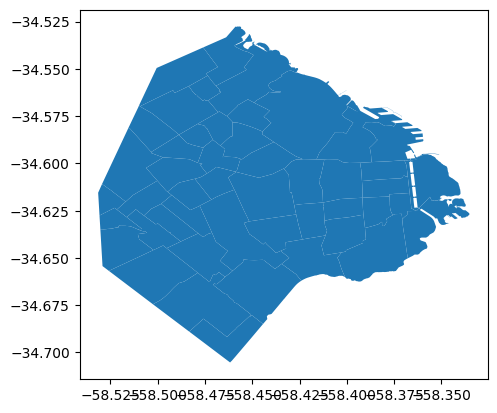

In [10]:
geo_bairros.plot();

#### Ponto

Às vezes, precisamos inserir a localização de um determinado lugar. Por exemplo, vamos criar um `GeoDataFrame` que contém um *Point*, que representa os dados `geoespaciais` de umedifício $A$.

Neste caso, vamos criar um Point com a ajuda de `shapely`. E então o transformamos em um `DataGeoFrame` para podermos representá-lo graficamente.

In [11]:
from shapely.geometry import Point

p = Point(-58.443555, -34.548921) # Dado geoespacial do edifício A
df = pd.DataFrame(data = {'id': [1]}) # Criamos um DataFrame

display(df)

geo_A = gpd.GeoDataFrame(df, 
                          geometry = [p]) # O transformamos em um GeoDataFrame

geo_A

,id
0,1


,id,geometry
0,1,POINT (-58.44356 -34.54892)


In [12]:
type(geo_A)

geopandas.geodataframe.GeoDataFrame

Representamos graficamente o ponto que representa o edifício $A$ nos bairros de Buenos Aires.

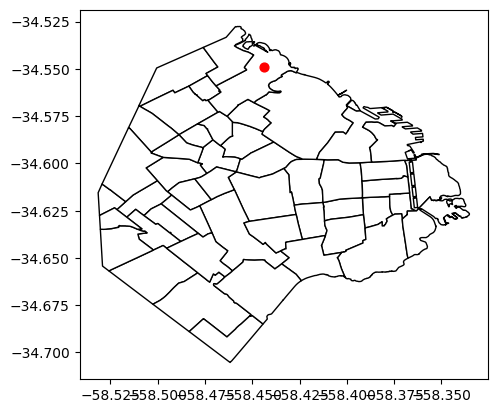

In [13]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

geo_bairros.plot(ax = ax, 
                 color = 'white', 
                 edgecolor = 'black'
                )

geo_A.plot(ax = ax, 
            marker = 'o', 
            color = 'red', 
            markersize = 40
           )

plt.show();

Leia o arquivo `comisarias.csv` e gere a coluna `'geometry'` que representa os dados geoespaciais de cada comissário.

---

### Generar una línea entre dos pontos

Partindo de dois *pontos* que representam dois lugares, podemos traçar a *linha* que os une.

Suponha que queremos fazer um *tour* por alguns locais de dança. Começamos na "REY CASTRO", depois na "AFRIKA", "LA CITY" e terminamos no mesmo dia na "PACHA BS AS".

Queremos saber a rota linear que vamos fazer.

Tenemos que transformar las coordenadas de las columnas X e Y  de los locales bailables, en un tipo de datos Point, para generar la línea entre los pontos.

Observar que el tipo de datos *Point* es distinto al tipo de datos *geometry*.




Temos que transformar as coordenadas das colunas $X$ e $Y$ dos locais de dança, em um tipo de dados `Point`, para gerar a linha entre os pontos.

Observe que o tipo de dados `Point` é diferente do tipo de dados `geometry`.

In [14]:
point_rey_castro = Point(geo_locais[geo_locais['NAME'] == 'REY CASTRO'].X,
                         geo_locais[geo_locais['NAME'] == 'REY CASTRO'].Y)

point_afrika = Point(geo_locais[geo_locais['NAME'] == 'AFRIKA'].X,
                     geo_locais[geo_locais['NAME'] == 'AFRIKA'].Y
                    )

point_la_city = Point(geo_locais[geo_locais['NAME'] == 'LA CITY'].X,
                      geo_locais[geo_locais['NAME'] == 'LA CITY'].Y
                     )

point_pacha = Point(geo_locais[geo_locais['NAME'] == 'PACHA BS AS'].X,
                    geo_locais[geo_locais['NAME'] == 'PACHA BS AS'].Y
                   )

In [15]:
point_afrika.type

/var/folders/cz/8wxdxxx55vz69s8s08w90yvh0000gn/T/ipykernel_32205/2823325016.py:1: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  point_afrika.type


'Point'

E agora criamos as [linhas](https://mathworld.wolfram.com/Line.html) entre dois pontos, usando o método [`LineString()`](https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html) da biblioteca shapely.

In [16]:
from shapely.geometry import LineString

line_a = LineString([point_rey_castro, point_afrika])
line_b = LineString([point_afrika, point_la_city])
line_c = LineString([point_la_city, point_pacha])

In [17]:
line_a.type

/var/folders/cz/8wxdxxx55vz69s8s08w90yvh0000gn/T/ipykernel_32205/423891082.py:1: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  line_a.type


'LineString'

Por fim, traçamos as linhas sobre os bairros de Buenos Aires.

Mas para plotar, precisamos do método `plot()` que *se aplica* ao `GeoSeries` e ao `GeoDataFrame`.

Até agora temos pontos e linhas, com os tipos de dados *Point* e *LineString* respectivamente. Temos que gerar uma `Geoserie` com os dois pontos e a linha que os liga para podermos representá-los graficamente.

In [18]:
line_a_geo = gpd.GeoSeries([point_rey_castro, point_afrika, line_a])
line_b_geo = gpd.GeoSeries([point_afrika, point_la_city, line_b])
line_c_geo = gpd.GeoSeries([point_la_city, point_pacha, line_c])

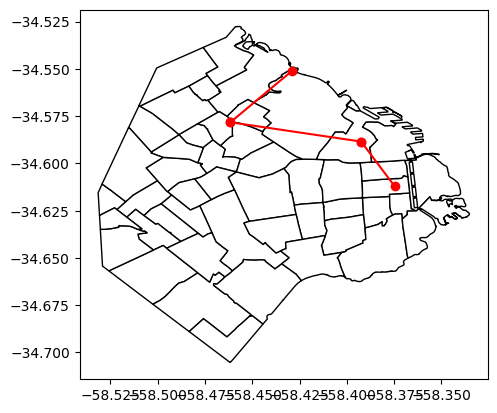

In [19]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_bairros.plot(ax = ax, 
                 color = 'white', 
                 edgecolor = 'black'
                )

line_a_geo.plot(ax = ax, 
                color = 'red'
               )

line_b_geo.plot(ax = ax, 
                color = 'red'
               )

line_c_geo.plot(ax = ax, 
                color = 'red'
               )

plt.show();

### Determinar se um ponto está dentro de um polígono

Com o método [`geopandas.GeoSeries.contains()`](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.contains.html) podemos ver se um polígono contém um ponto.

Como exemplo, vamos ver se o local de dança *REY CASTRO* está localizado no bairro *MONSERRAT*. Primeiro, geramos dois `GeoDataFrames` com os dados do bairro e do local de dança.

In [20]:
geo_monserrat = geo_bairros.loc[geo_bairros["NEIGHBORHOOD"] == "MONSERRAT"]
geo_rey_castro = geo_locais[geo_locais['NAME'] == 'REY CASTRO'] 

In [21]:
type(geo_rey_castro)

geopandas.geodataframe.GeoDataFrame

Verificamos visualmente se "REY CASTRO" é encontrado no bairro "MONSERRAT".

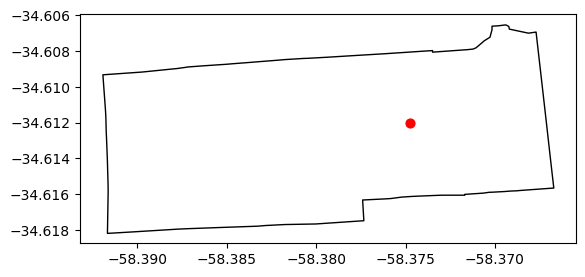

In [22]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

geo_monserrat.plot(ax = ax, 
                   color = 'white', 
                   edgecolor = 'black'
                  )

geo_rey_castro.plot(ax = ax, 
                    marker = 'o', 
                    color = 'red', 
                    markersize = 40
                   )

plt.show();

Agora o validamos com a função [`geopandas.GeoSeries.contains()`](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.contains.html).

Observe que para o local de dança, usamos `point_rey_castro`, o tipo de dados `Point` gerado anteriormente. Se usarmos o `GeoDataFrame` `geo_rey_castro`, o método contains dá um erro.

In [23]:
geo_monserrat.contains(point_rey_castro)

41    True
dtype: bool

Pensando como figuras geométricas, uma linha pode passar por vários polígonos. Como exemplo, vamos considerar a linha que traçamos entre os locais de dança "AFRIKA" e "LA CITY" que geramos com a seguinte frase:

```python
line_b = LineString ([point_afrika, point_la_city])`
```

E vamos analisar o que os bairros que ela atravessa

O método [`geopandas.GeoSeries.crosses()`](https://geopandas.readthedocs.io/en/latest/docs/reference/api/geopandas.GeoSeries.crosses.html) aplicado ao `GeoDataFrame` dos bairros, indica `True` ou ˜False˜ consoante se a linha cruza ou não cada bairro (polígono). Ou seja, ele retorna dados do tipo *booleano* para indicar se ele passa pelo polígono.

Podemos ver que para os primeiros bairros, só cruza o bairro que tem índice $0$.

In [24]:
geo_bairros.crosses(line_b).head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

Agora aplicamos o resultado anterior para obter os bairros por onde passa.

In [25]:
geo_bairros.loc[geo_bairros.crosses(line_b), 'NEIGHBORHOOD']

0         CHACARITA
23       COLEGIALES
28    VILLA ORTUZAR
33          PALERMO
44         RECOLETA
Name: NEIGHBORHOOD, dtype: object

Podemos verificar isso visualmente

In [26]:
options = ['CHACARITA', 'COLEGIALES', 'VILLA ORTUZAR', 'PALERMO', 'RECOLETA'] 
geo_bairros_recorrida = geo_bairros[geo_bairros['NEIGHBORHOOD'].isin(options)] 
geo_bairros_recorrida

,WKT,NEIGHBORHOOD,COMMUNE,PERIMETER,AREA
0,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",CHACARITA,15.0,7725.695228,3.118101e+06
23,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",COLEGIALES,13.0,6374.619045,2.289774e+06
28,"POLYGON ((-58.46055 -34.57794, -58.46022 -34.5...",VILLA ORTUZAR,15.0,5684.995211,1.853802e+06
33,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...",PALERMO,14.0,21768.074886,1.577250e+07
44,"POLYGON ((-58.39521 -34.57219, -58.39482 -34.5...",RECOLETA,2.0,21246.611702,6.140873e+06


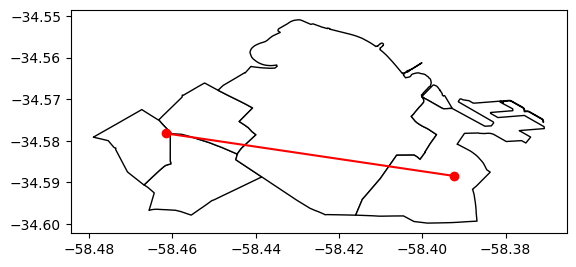

In [27]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

geo_bairros_recorrida.plot(ax = ax, 
                           color = 'white', 
                           edgecolor = 'black'
                          )

line_b_geo.plot(ax = ax, 
                color = 'red'
               )

plt.show();

### Calcular a distância entre dois pontos

Agora que sabemos traçar linhas entre dois pontos, é razoável perguntar qual é a distância entre eles. Vamos calcular a *distância* entre a localização do edifício $A$ e todos os locais de dança. E armazenamos a distância como uma nova coluna do `GeoDataFrame` `geo_locais`.

Vamos começar calculando uma distância particular. Por exemplo, entre o edifício $A$ e o salão de dança "AFRIKA".

Geramos um ponto que identifica a posição geoespacial de cada local. Observe que para definir a latitude e longitude de cada lugar, a biblioteca [geopy](https://geopy.readthedocs.io/en/stable/) precisa ser expressa como uma ** tupla **.

In [28]:
point_A_t = ( -58.443555,-34.548921) # dado geoespacial do edifício A
point_afrika_t = ( -58.39239, -34.58843) # dado geoespacial de Afrika

In [29]:
type(point_A_t)

tuple

Para calcular distâncias entre dois pontos, usamos a biblioteca [`geopy`](https://towardsdatascience.com/things-to-do-with-latitude-longitude-data-using-geopy-python-1d356ed1ae30), o método * distance *.

Observe que o resultado pode ser expresso em diferentes unidades de medida: metros, quilômetros, milhares.

In [30]:
import geopy.distance
dist = geopy.distance.geodesic(point_A_t, 
                               point_afrika_t
                              )
dist.meters

/Users/rudineycasali/Documents/Project_Ada_Tech/venv_Ada/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


6149.000030999573

In [31]:
dist.kilometers

6.149000030999573

Agora sim, calculamos todas as distâncias entre o edifício $A$ e os locais de dança, e salvamos como uma nova coluna `distance` no `GeoDataFrame` `geo_locais`.

In [32]:
for i in geo_locais.index:
    geo_locais.loc[i, 'distance'] = geopy.distance.geodesic(point_A_t, 
                                                             (geo_locais.loc[i,'geometry'].x, 
                                                              geo_locais.loc[i,'geometry'].y
                                                             )
                                                            ).meters

In [33]:
geo_locais.loc[ : 4, ['distance', 'geometry', 'X','Y','NAME','STREET', 'FILE_NUMBER']]

,distance,geometry,X,Y,NAME,STREET,FILE_NUMBER
0,6444.086302,POINT (-58.39375 -34.60503),-58.393750,-34.605027,CASTELBAMBA,RIOBAMBA,4627093/18
1,7750.134933,POINT (-58.37851 -34.59600),-58.378510,-34.596003,GOLDEN,ESMERALDA,10561/05
2,8507.137497,POINT (-58.37473 -34.61200),-58.374727,-34.612002,REY CASTRO,PERU,4407796/18
3,6806.307281,POINT (-58.39015 -34.60553),-58.390154,-34.605531,LA FRANCE,SARMIENTO,3005915/18
4,8578.074664,POINT (-58.37175 -34.60195),-58.371747,-34.601950,BAHREIN,LAVALLE,2219876/18


In [34]:
geo_locais.loc[geo_locais['distance'].idxmin(), : ]

X                                                                -58.447784
Y                                                                -34.547025
REGISTRATION_NUMBER                                                      55
NAME                                                                CLUB 74
STREET                                                    FIGUEROA ALCORTA 
NUMBER                                                                 7474
STANDARD_ADDRESS                                     FIGUEROA ALCORTA  7474
FILE_NUMBER                                                        10836/05
CAPACITY                                                       180 personas
CLASS                                                                   "B"
STATUS                                                  INSCRIPCION VENCIDA
DISPOSITION                                                              65
ENROLLMENT_DISP_DATE                                    2005-05-18 00:00:00
DIPS_NUMBER 

Calcule a distância entre os locais de dança `'LA CITY'` e `'PACHA BS AS'`.

### Referências

- [The GeoPandas Cookbook](https://www.martinalarcon.org/2018-12-31-d-geopandas)

- [Creating a GeoDataFrame from a DataFrame with coordinates](https://geopandas.org/gallery/create_geopandas_from_pandas.html)

- [The Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html)

- [Welcome to GeoPy’s documentation!](https://geopy.readthedocs.io/en/stable/)